### Ecuaciones diferenciales tipo elíptico

ss

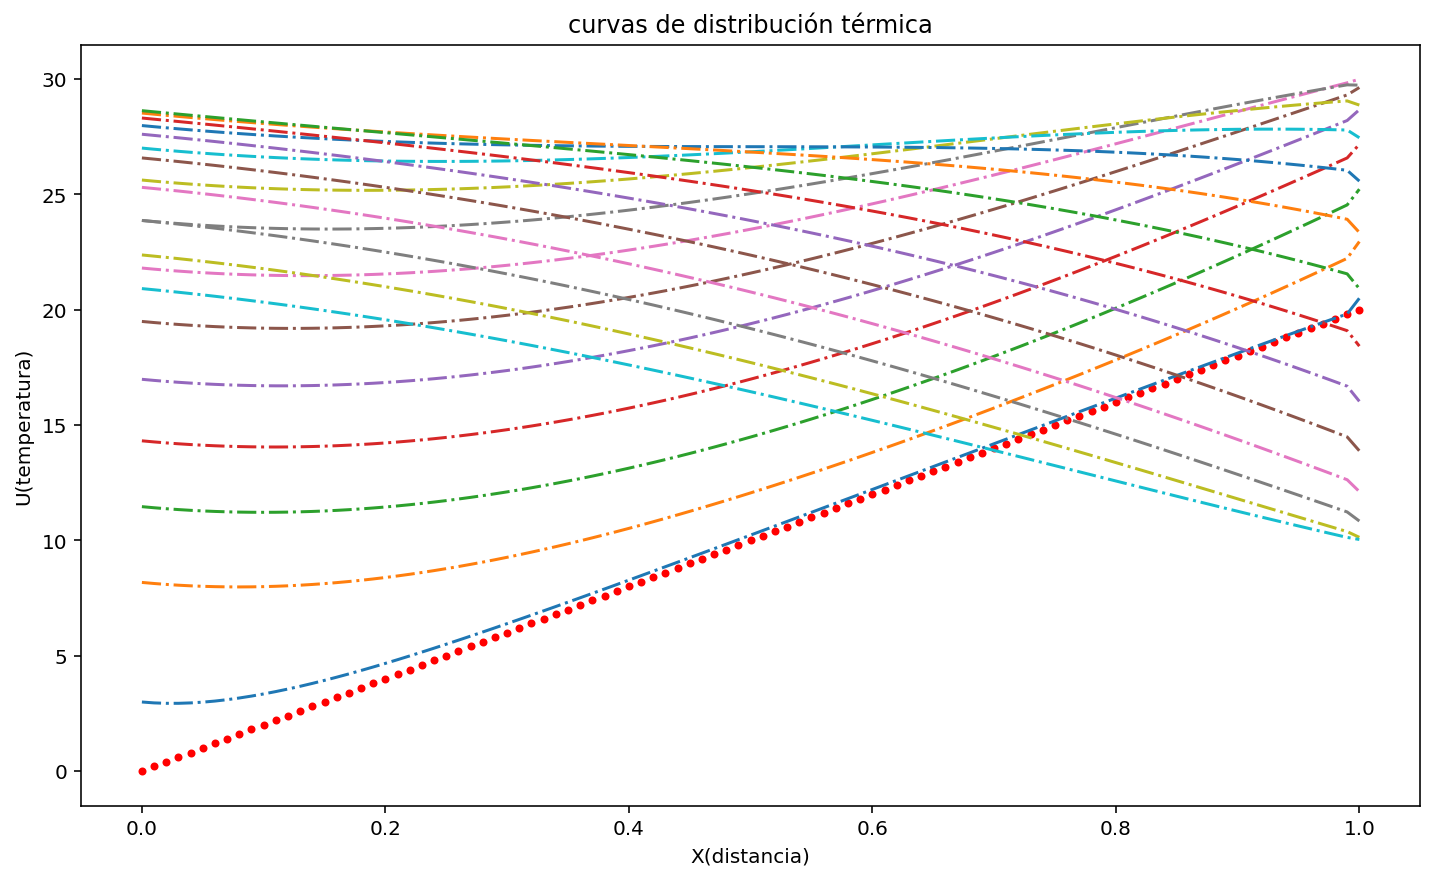

In [12]:
from tridiagonal import*
import numpy as np
def edpdifpid(P,Q,R,U,der0,dx,m):
    #Método de diferencias finitas  implicito
    a=[];b=[];c=[];d=[]
    for i in range(m-1):
        a=a+[P]
        b=b+[Q]
        c=c+[R]
        d=d+[-U[i+1]]
    c[0]=P+R
    d[0]=d[0]+2*dx*P*der0
    d[m-2]=d[m-2]-c[m-2]*U[m-1]
    u=tridiagonal(a,b,c,d)
    U=u
    return U
from pylab import*
m=101      #numero de ecuaciones m-1
n=100       #numero de niveles en t
der0=-5    #derivada en el borde izquierdo
L=1        # longitud
#t=np.arange(0,50,50)
#x=np.arange(0,1,11)
#Tb=20+10*np.sin(t)      #condiciones en los bordes
#To=40*x      #condiciones en el inicio
dx=L/float(m-1)    #incrementos
dt=0.05
k=4        #dato especificado
U=[]       #asignacion incial
for i in range(m-1):
    U=U+[50*i*dx]
U=U+[20.]
#print(U)
lamb=dt/(k*dx**2)
P=lamb
Q=-1-2*lamb
R=lamb
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1)
ax.set_title('curvas de distribución térmica')
ax.set_xlabel('X(distancia)')
ax.set_ylabel('U(temperatura)')
x=[]
for i in range(m):
    x=x+[i*dx]          # coordenadas para el gráfico
ax.plot(x,U,'.r')          #distribución inicial
for j in range(n):
    U=edpdifpid(P,Q,R,U,der0,dx,m)
    #print(U)
    U=U+[20+10*np.sin((j+1)*dt)]
    if j%5==0:
        ax.plot(x,U,'-.')

In [1]:
Ta=60
Tc=50
L1=2
Tb=40


In [2]:
# Programa para resolver una EDP elíptica
#con condicones constates en lo bordes
from numpy import*
Ta=60; Tb=60; Tc=50; Td=70 #Bordes izq,der,abajo,arriba
n=10                       #Puntos interiores en dirección hor(X)
m=10                       #Puntos interiores en dirección ver (Y)
miter=100                 #Max de iteraciones
e=0.001                     #Error de truncamiento relativo 0.1%
u=zeros([n+2,m+2])
for i in range(n+2):
    u[i][0]=Tc
    u[i][m+1]=Td
for j in range(m+2):
    u[0][j]=Ta
    u[n+1][j]=Tb
p=0.25*(Ta+Tb+Tc+Td)           #valor inicial
for i in range(1,n-1):
    for j in range(1,m-1):
        u[i][j]=p

[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
[50.0, 55.05, 57.11, 58.15, 58.81, 59.35, 59.88, 60.48, 61.26, 62.47, 64.72, 70.0]
[50.0, 53.15, 55.29, 56.75, 57.85, 58.81, 59.77, 60.84, 62.16, 63.93, 66.44, 70.0]
[50.0, 52.31, 54.25, 55.82, 57.16, 58.41, 59.67, 61.07, 62.71, 64.7, 67.14, 70.0]
[50.0, 51.92, 53.7, 55.29, 56.75, 58.16, 59.61, 61.2, 63.0, 65.08, 67.44, 70.0]
[50.0, 51.77, 53.48, 55.07, 56.58, 58.06, 59.61, 61.28, 63.15, 65.24, 67.56, 70.0]
[50.0, 51.79, 53.5, 55.1, 56.62, 58.11, 59.65, 61.32, 63.18, 65.26, 67.57, 70.0]
[50.0, 51.96, 53.77, 55.39, 56.86, 58.28, 59.73, 61.31, 63.09, 65.14, 67.47, 70.0]
[50.0, 52.36, 54.35, 55.96, 57.32, 58.58, 59.84, 61.22, 62.83, 64.78, 67.18, 70.0]
[50.0, 53.2, 55.39, 56.88, 58.01, 58.98, 59.93, 60.99, 62.28, 64.01, 66.48, 70.0]
[50.0, 55.09, 57.17, 58.24, 58.92, 59.47, 59.99, 60.58, 61.34, 62.53, 64.75, 70.0]
[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
Conteo de iteraciones: 41


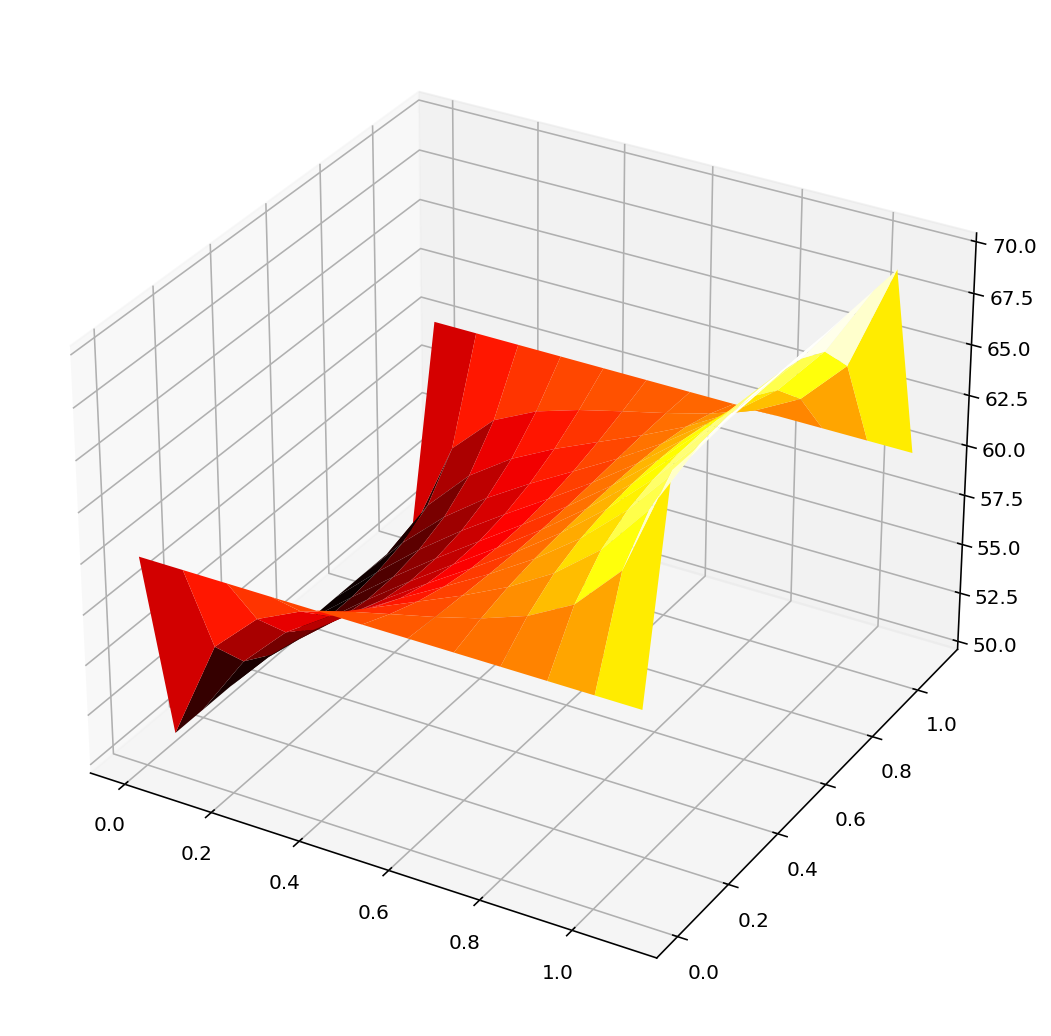

In [6]:
k=0                             #conteo iteraciones
converge=0                      #señal de convergencia
while k<miter and converge==0:
    k=k+1
    t=u.copy()
    for i in range(1,n+1):
        for j in range(1,m+1):
            u[i][j]=0.25*(u[i-1][j]+u[i+1][j]+u[i][j+1]+u[i][j-1])
    if linalg.norm((u-t),inf)/linalg.norm(u,inf)<e:
        converge=1
if converge==1:
    for i in range(n+2):       #Malla con la solución final
        print([float('%5.2f'%(u[i][j]))for j in range(m+2)])
    print('Conteo de iteraciones:',k) #Conteo de iteraciones
    from pylab import*
    from mpl_toolkits.mplot3d import Axes3D  #Grafico 3D
    fig=figure()
    ax=Axes3D(fig)
    x=arange(0,1.2,.1)
    y=arange(0,1.2,0.1)
    X,Y=meshgrid(x,y)
    ax.plot_surface(X,Y,u,rstride=1,cstride=1,cmap='hot')
    show()
else:
    print('No coverge')

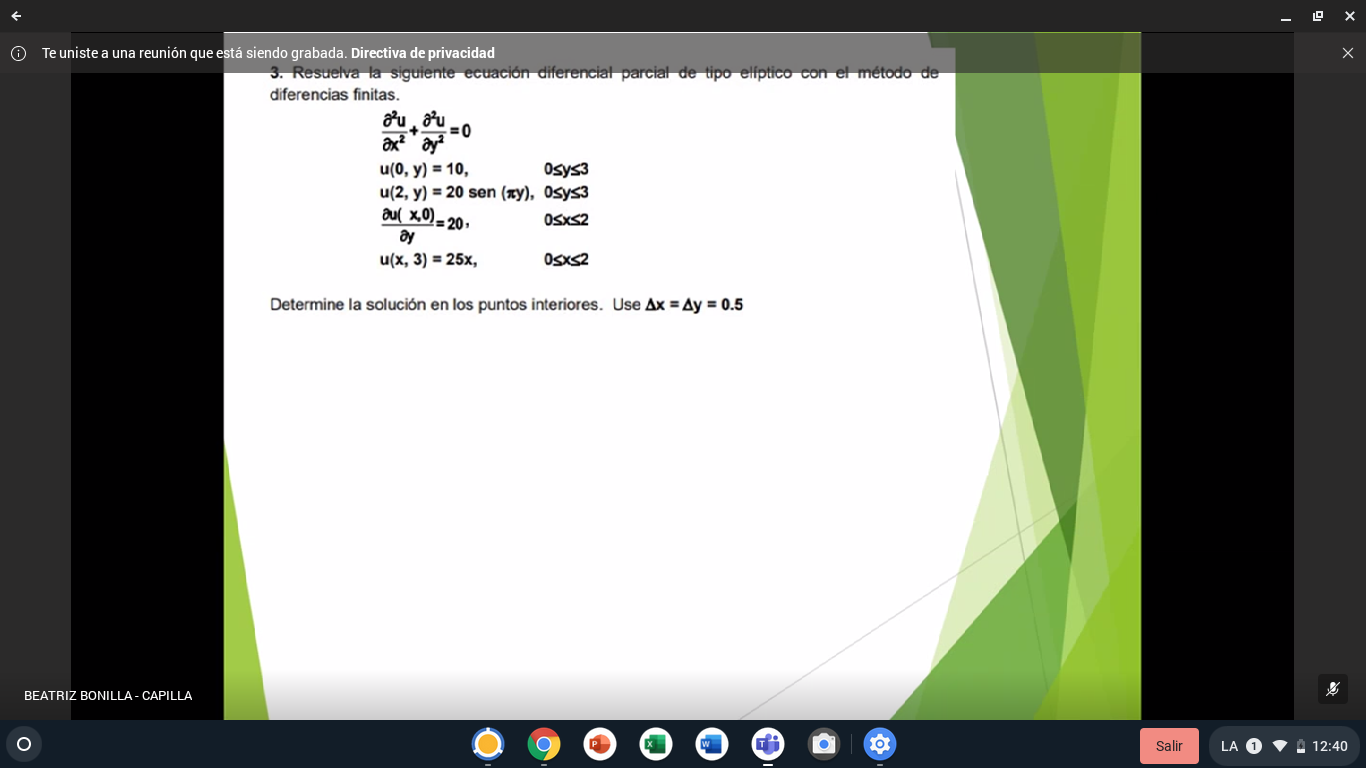